# AI Workshop 2024
EikLab

## PART 1 - Detection

Installer ultralytics

In [ ]:
%pip install ultralytics

Importer YOLO

In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("yolov8m.pt")

In [3]:
results = model.predict("dogs.jpg")


image 1/1 c:\Users\Lavanyan Rathy\Documents\eik\AI_WS\AI_workshop_2024\CNN\dogs.jpg: 384x640 2 persons, 2 dogs, 1 bottle, 1 bed, 570.0ms
Speed: 12.2ms preprocess, 570.0ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)


In [4]:
result = results[0]
print(len(result.boxes))

6


In [5]:
for box in result.boxes:
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type:",label)
    print("Cords:",cords)
    print("Probability:",prob)
    print("---")

Object type: 16.0
Cords: [2, 54, 1382, 1659]
Probability: 0.9417084455490112
---
Object type: 16.0
Cords: [1644, 99, 2946, 1653]
Probability: 0.9388278722763062
---
Object type: 0.0
Cords: [549, 1121, 965, 1674]
Probability: 0.8662398457527161
---
Object type: 0.0
Cords: [1313, 1229, 1490, 1677]
Probability: 0.7862735390663147
---
Object type: 39.0
Cords: [280, 1253, 577, 1579]
Probability: 0.3637550473213196
---
Object type: 59.0
Cords: [1499, 37, 2948, 1654]
Probability: 0.29987043142318726
---


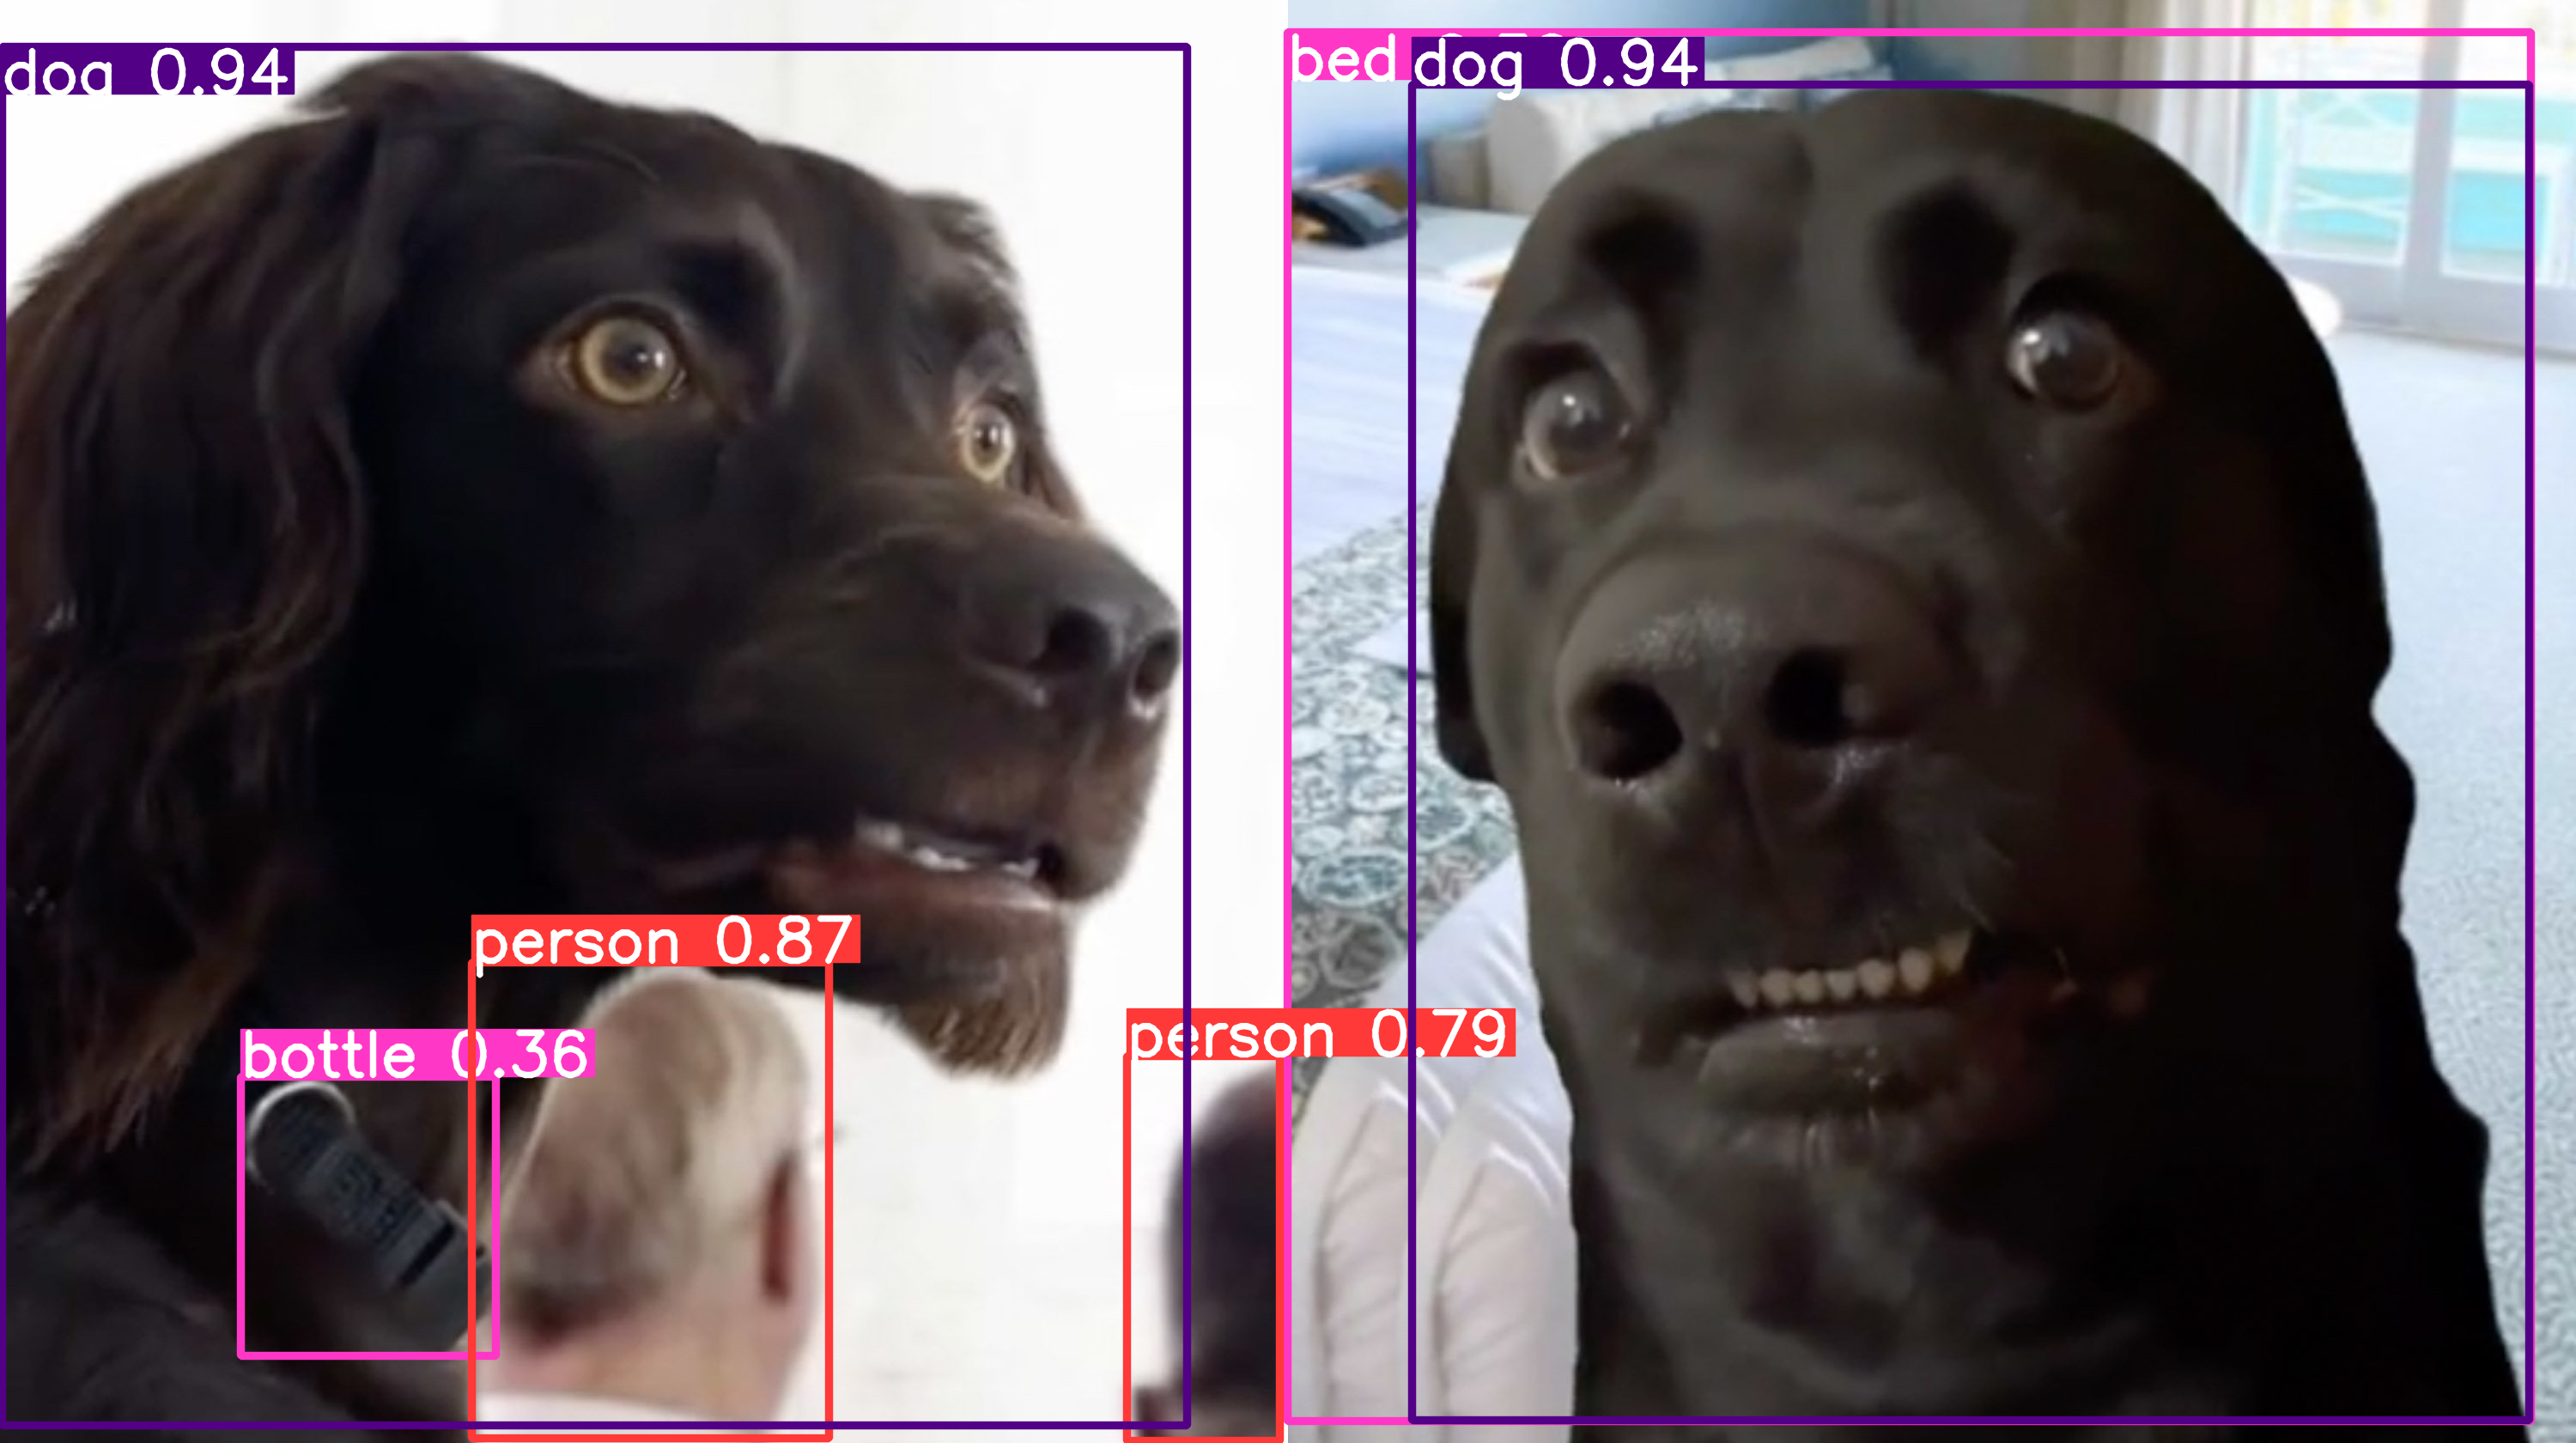

In [6]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

Nå kan dere prøve å kjøre YOLO på et bilde som dere har lastet opp.

## Part 2 - Segmentation

In [6]:
from ultralytics import YOLO
import random
import cv2
import numpy as np

In [7]:
model = YOLO("yolov8m-seg.pt")

In [8]:
img = cv2.imread("dogs.jpg")


# if you want all classes
yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

conf = 0.5

results = model.predict(img, conf=conf)
colors = [random.choices(range(256), k=3) for _ in classes_ids]
print(results)
for result in results:
    for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        # cv2.polylines(img, points, True, (255, 0, 0), 1)
        color_number = classes_ids.index(int(box.cls[0]))
        cv2.fillPoly(img, points, colors[color_number])


0: 384x640 2 persons, 2 dogs, 505.3ms
Speed: 3.7ms preprocess, 505.3ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana

In [9]:
cv2.imshow("Image", img)
cv2.waitKey(0)

False

## Part 3 - Deteksjon av live footage

In [2]:
from ultralytics import YOLO
import cv2
import cvzone
import math

# For Webcam
#cap = cv2.VideoCapture(0)
#cap.set(3, 1080)
#cap.set(4, 720)

# Using Videos
cap = cv2.VideoCapture('car-videos.mp4')

model = YOLO("yolov8n.pt")

className = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
             "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
             "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra",
             "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
             "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
             "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
             "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange",
             "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa",
             "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
             "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink",
             "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
             "toothbrush"
             ]

while True:
    success, img = cap.read()
    result = model(img, stream=True)
    for r in result:
        boxes = r.boxes
        for box in boxes:
            # Bounding Box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            # cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 3)

            # cvZone
            w, h = x2-x1, y2-y1
            bbox = x1, y1, w, h
            cvzone.cornerRect(img, bbox)
            # Confidence
            conf = math.ceil((box.conf[0]*100))/100
            # Class Name
            cls = int(box.cls[0])

            #Display Confidence & Class
            cvzone.putTextRect(img, f'{className[cls]} {conf}', (max(0, x1+15), max(35, y1-15)), scale= 2, thickness= 2)



    cv2.imshow("Image", img)
    cv2.waitKey(1)

    #pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


0: 384x640 4 cars, 150.7ms
Speed: 30.8ms preprocess, 150.7ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 475.6ms
Speed: 11.0ms preprocess, 475.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 132.2ms
Speed: 8.9ms preprocess, 132.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 112.6ms
Speed: 3.3ms preprocess, 112.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 111.7ms
Speed: 2.3ms preprocess, 111.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 108.3ms
Speed: 2.0ms preprocess, 108.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 96.7ms
Speed: 2.3ms preprocess, 96.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 102.3ms
Speed: 2.0ms preprocess, 102.3ms inference, 1.0ms postprocess per image at shape (1, 3, 38

KeyboardInterrupt: 

## Oppgave: